In [4]:
import tensorflow as tf  

# 合并与分割

+ tf.concat:保证一个维度不相等
+ tf.split:分得更加随意(可不均分)
+ tf.stack:创建新的维度  保证所有维度相等
+ t.unstack:把某一维度解分(均分)

In [2]:
a = tf.ones([4,35,8])
b = tf.ones([2,35,8])
c = tf.concat([a,b],axis=0) #类似数组的索引方式 指出合并的维度
c.shape

TensorShape([6, 35, 8])

In [22]:
aa = tf.ones([4,35,8])
bb = tf.ones([4,35,8])
c = tf.stack([aa,bb],axis=0) #axis控制增加维度位置
#d = tf.stack([a,b],axis=1).shape
c.shape

TensorShape([2, 4, 35, 8])

In [23]:
aa,bb = tf.unstack(c, axis=0) #把某一维度解分
print(aa.shape, bb.shape)

(4, 35, 8) (4, 35, 8)


In [25]:
res = tf.unstack(c,axis=3)
res[0].shape

TensorShape([2, 4, 35])

In [26]:
# 2个Tensor，一个6、一个2
res = tf.split(c, axis=3, num_or_size_splits=2)
len(res)

2

In [27]:
res = tf.split(c, axis=3, num_or_size_splits=[2, 2, 4])
print("第一个tensor的属性为"+str(res[0].shape))

第一个tensor的属性为(2, 4, 35, 2)


# 数据统计
+ tf.norm(x):平均化
+ tf.reduce_min/max/mean(x):reduce，操作可能会有减维的功能，如[2,2]，对行求max，会变成[2]
+ tf.argmax/argmin(x):最小值最大值所在位置
+ tf.equal(x,x1):逐个比较元素是否相等
+ tf.unique(x):用于去重(只能一维)

## Eukl.norm

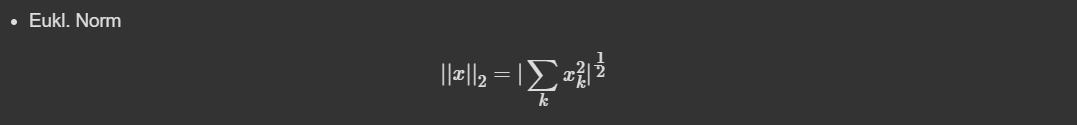

In [28]:
a = tf.ones([2,2])

In [29]:
tf.norm(a) #tf.sqrt(tf.reduce_sum(tf.square(a))) 同

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

## L1-norm

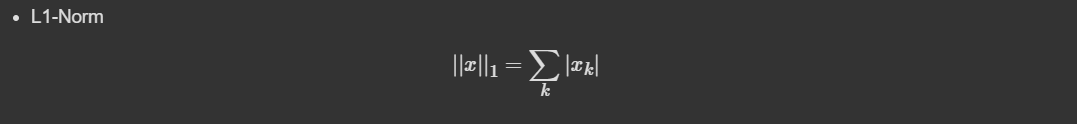

In [31]:
tf.norm(a,ord=2,axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 1.4142135], dtype=float32)>

In [34]:
tf.norm(a,ord=1)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [36]:
# 列为整体
tf.norm(a, ord=1, axis=0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>

In [37]:
# 行为整体
tf.norm(a, ord=1, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>

## reduce_min

In [38]:
a = tf.random.normal([2,3])
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.8870304 , 0.78386545, 0.65997666],
       [1.5771023 , 0.60107803, 0.31403047]], dtype=float32)>

In [39]:
print("最小值为："+str(tf.reduce_min(a)))
print("最大值为："+str(tf.reduce_max(a)))
print("平均值为："+str(tf.reduce_mean(a)))

最小值为：tf.Tensor(0.31403047, shape=(), dtype=float32)
最大值为：tf.Tensor(1.5771023, shape=(), dtype=float32)
平均值为：tf.Tensor(0.80384725, shape=(), dtype=float32)


In [40]:
#对每一行求：
print("最小值为："+str(tf.reduce_min(a,axis=1)))
print("最大值为："+str(tf.reduce_max(a,axis=1)))
print("平均值为："+str(tf.reduce_mean(a,axis=1)))

第二行最小值为：tf.Tensor([0.65997666 0.31403047], shape=(2,), dtype=float32)
最大值为：tf.Tensor([0.8870304 1.5771023], shape=(2,), dtype=float32)
平均值为：tf.Tensor([0.7769575 0.8307369], shape=(2,), dtype=float32)


## argmin

In [43]:
tf.argmin(a).shape
tf.argmin(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 1], dtype=int64)>

In [42]:
tf.argmin(a,axis=1).shape

TensorShape([2])

## unique

In [46]:
a = tf.constant([1,2,3,1,1,3,2])
tf.unique(a)

Unique(y=<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>, idx=<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 0, 0, 2, 1])>)

# 张量排序
+ tf.sort(x):直接排序
+ tf.argsort(x):返回排序索引
+ tf.math.top_k(x,a):返回前a的值 values-值 indices-索引

## Sort/argsort

In [48]:
a = tf.random.shuffle(tf.range(5))
a

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([3, 0, 4, 1, 2])>

In [50]:
tf.sort(a,direction="DESCENDING")

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0])>

In [52]:
idx = tf.argsort(a,direction="DESCENDING")
tf.gather(a,idx)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0])>

In [53]:
b = tf.random.uniform([3,3],maxval=10,dtype=tf.int32)
b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[6, 3, 8],
       [7, 3, 8],
       [2, 4, 9]])>

In [54]:
tf.sort(b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[3, 6, 8],
       [3, 7, 8],
       [2, 4, 9]])>

## Top_k

In [57]:
b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[6, 3, 8],
       [7, 3, 8],
       [2, 4, 9]])>

In [62]:
#返回前两个值
res = tf.math.top_k(b,2)

In [64]:
res.values

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[8, 6],
       [8, 7],
       [9, 4]])>

In [66]:
res.indices

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 0],
       [2, 0],
       [2, 1]])>

# 填充与复制
+ tf.pad(x,[[0维],[1维]])(有-a 无-0)
+ tf.tile(x,[1,2])

## Pad

In [68]:
a = tf.reshape(tf.range(9),[3,3])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])>

In [69]:
tf.pad(a,[[0,0],[0,0]])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])>

In [73]:
tf.pad(a,[[1,0],[0,0]])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])>

In [74]:
a = tf.random.normal([4, 28, 28, 3])
# 对图片的行和列padding两行
b = tf.pad(a, [[0, 0], [2, 2], [2, 2], [0, 0]])
b.shape

TensorShape([4, 32, 32, 3])

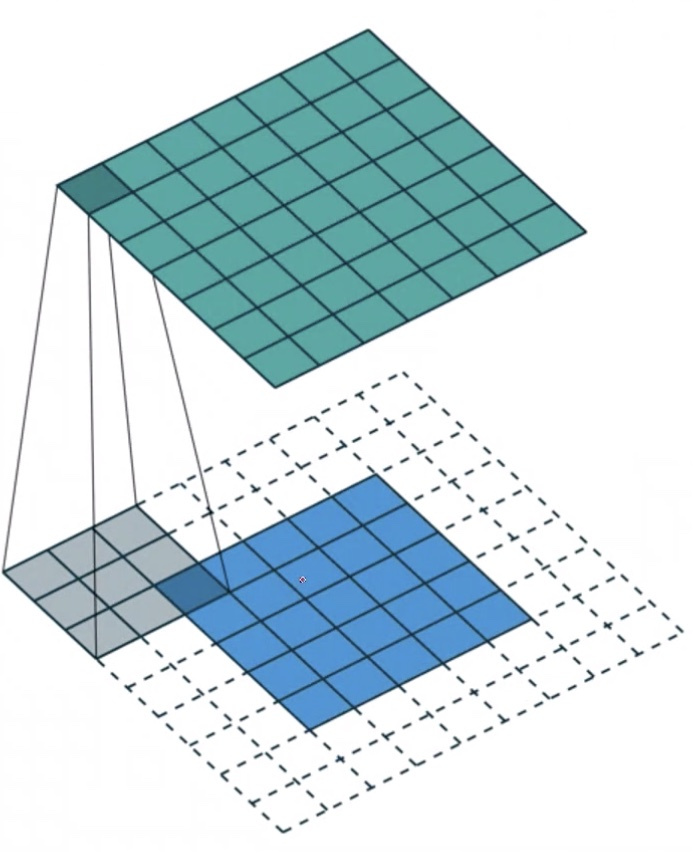

## Tile

In [76]:
# 1表示行不复制，2表示列复制为两倍
a = tf.reshape(tf.range(9), [3, 3])
tf.tile(a, [1, 2])

<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])>

In [77]:
tf.tile(a, [2, 2])

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])>

## broadcast_to VS tile

In [78]:
aa = tf.expand_dims(a, axis=0)
tf.tile(aa, [2, 1, 1])

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]],

       [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]])>

In [80]:
# 不占用内存，性能更优
tf.broadcast_to(a, [2, 3, 3])

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]],

       [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]])>

# 张量限幅
+ tf.maximum(x,a):小于a的变为a
+ tf.lip_by_value(x,a,b):将值控制在[a,b]
+ tf.nn.relu(x):小于0的全置为0
+ tf.cilp_by_norm(x,a):等比例的放缩x, norm为a
+ tf.clip_by_global_norm:裁剪所有向量，但是所有向量的梯度方向都不变化

## clip_by_value

In [83]:
a = tf.range(10)
# a中小于2的元素值为2
tf.maximum(a, 2)
# a中大于8的元素值为8
tf.minimum(a, 8)
# a中的元素值限制在[2,8]区间内
tf.clip_by_value(a, 2, 8)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8, 8])>

## relu

In [84]:
a = a-5
tf.nn.relu(a)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4])>

## clip_by_norm

In [86]:
a = tf.random.normal([2, 2], mean=10)
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9.585063 , 9.538884 ],
       [9.924984 , 7.8500166]], dtype=float32)>

In [87]:
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=18.520039>

In [89]:
b = tf.clip_by_norm(a,15)
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[7.7632637, 7.725862 ],
       [8.038577 , 6.3579917]], dtype=float32)>

In [90]:
tf.norm(b) 

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

# 高阶操作
+ tf.boolean_mask(x, mask):满足mask规则的值
+ tf.where(mask)：满足mask规则的索引
+ tf.where(mask,A,B):True在A中选值 False在B中选值
+ tf.meshgrid(a,b):合并

## where(tensor)

In [92]:
a = tf.random.normal([3, 3])
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.76904804, -0.52647233,  0.21194041],
       [ 0.08083756,  1.2320715 ,  0.30018416],
       [ 0.2363576 , -1.2158011 , -1.6559461 ]], dtype=float32)>

In [93]:
mask = a>0
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[ True, False,  True],
       [ True,  True,  True],
       [ True, False, False]])>

In [94]:
# 为True元素的值
tf.boolean_mask(a, mask)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.76904804, 0.21194041, 0.08083756, 1.2320715 , 0.30018416,
       0.2363576 ], dtype=float32)>

In [95]:
# 为True元素，即>0的元素的索引
indices = tf.where(mask)
indices

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0]], dtype=int64)>

In [96]:
# 取回>0的值
tf.gather_nd(a, indices)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.76904804, 0.21194041, 0.08083756, 1.2320715 , 0.30018416,
       0.2363576 ], dtype=float32)>

## where(mask,A,B)

In [97]:
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[ True, False,  True],
       [ True,  True,  True],
       [ True, False, False]])>

In [98]:
A = tf.ones([3, 3])
B = tf.zeros([3, 3])
# True的元素会从A中选值，False的元素会从B中选值
tf.where(mask, A, B)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 0.]], dtype=float32)>

## scatter_nd

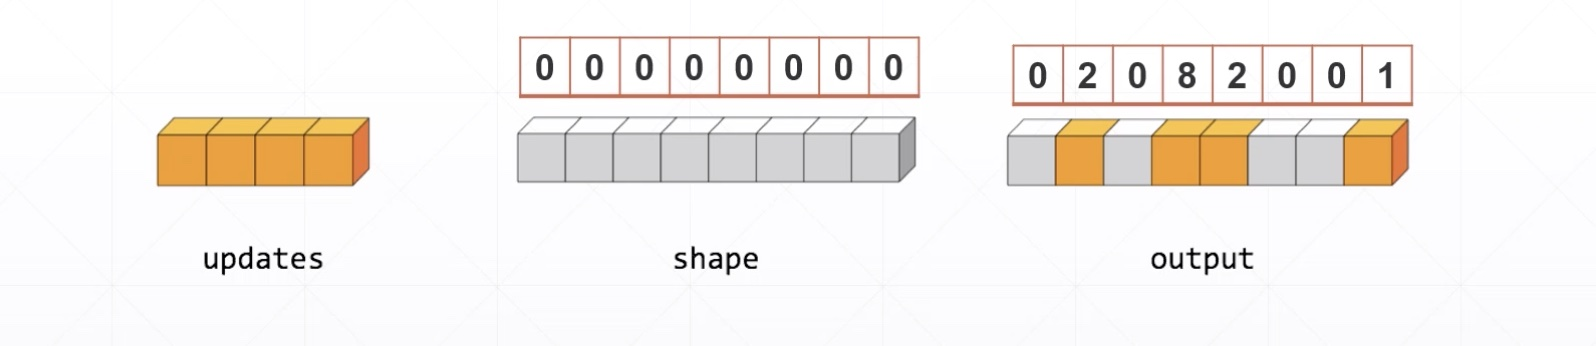

In [99]:
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
shape = tf.constant([8])

# 把updates按照indices的索引放在底板shape上
tf.scatter_nd(indices, updates, shape)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12])>

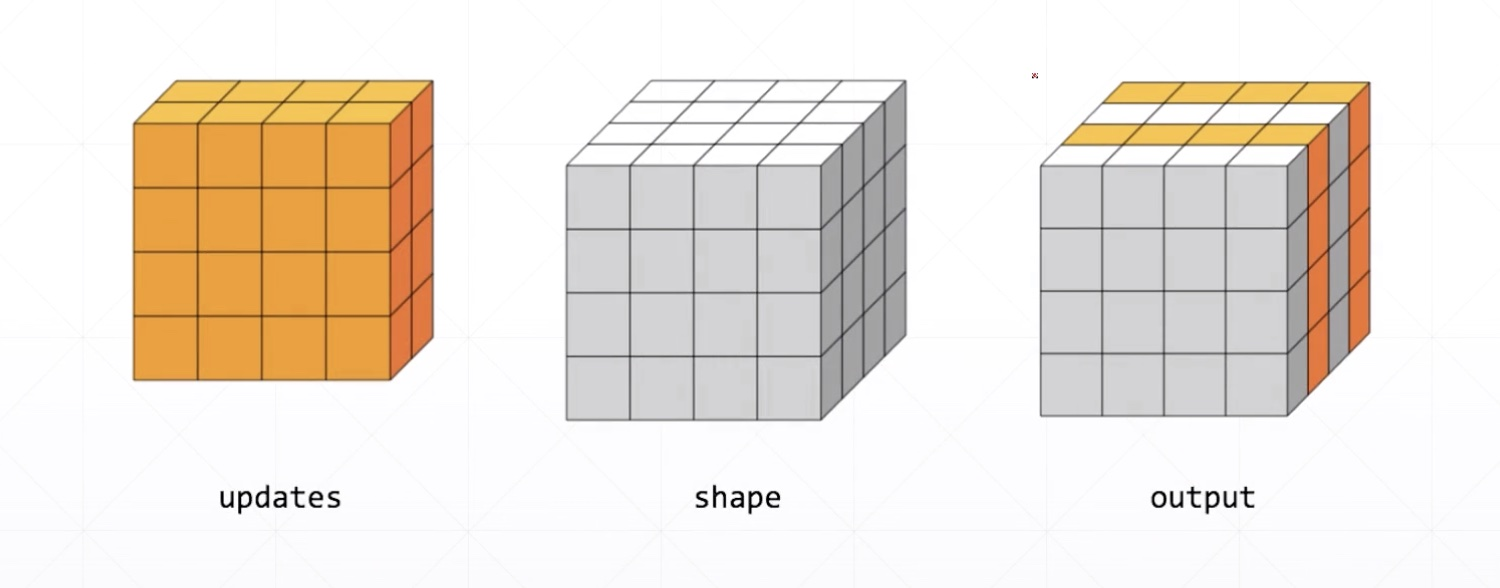

In [100]:
indices = tf.constant([[0], [2]])
updates = tf.constant([
    [[5, 5, 5, 5], [6, 6, 6, 6], [7, 7, 7, 7], [8, 8, 8, 8]],
    [[5, 5, 5, 5], [6, 6, 6, 6], [7, 7, 7, 7], [8, 8, 8, 8]],
])
updates.shape


TensorShape([2, 4, 4])

In [101]:
shape = tf.constant([4, 4, 4])
tf.scatter_nd(indices, updates, shape)

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])>

## meshgrid

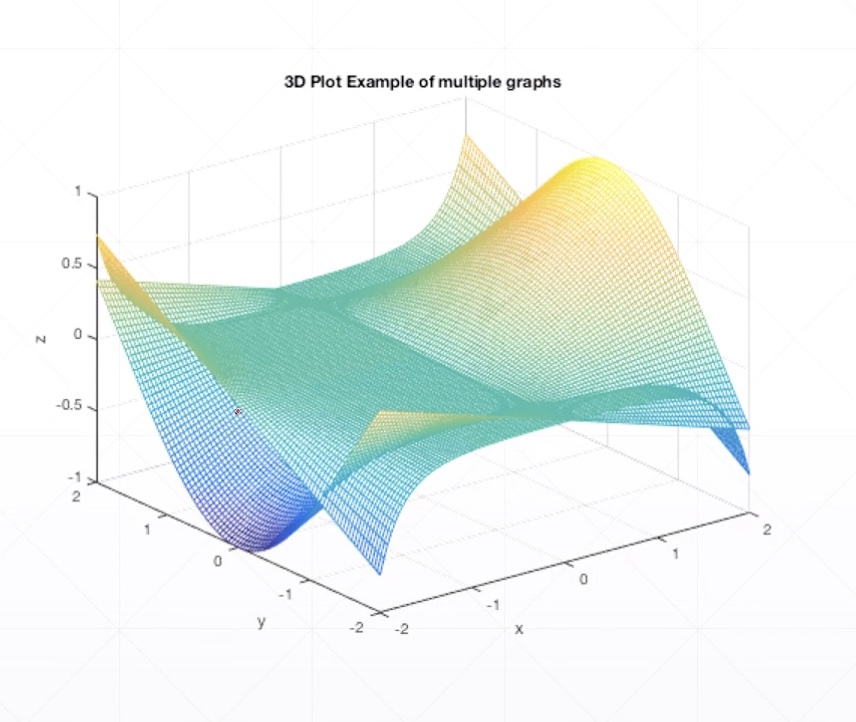

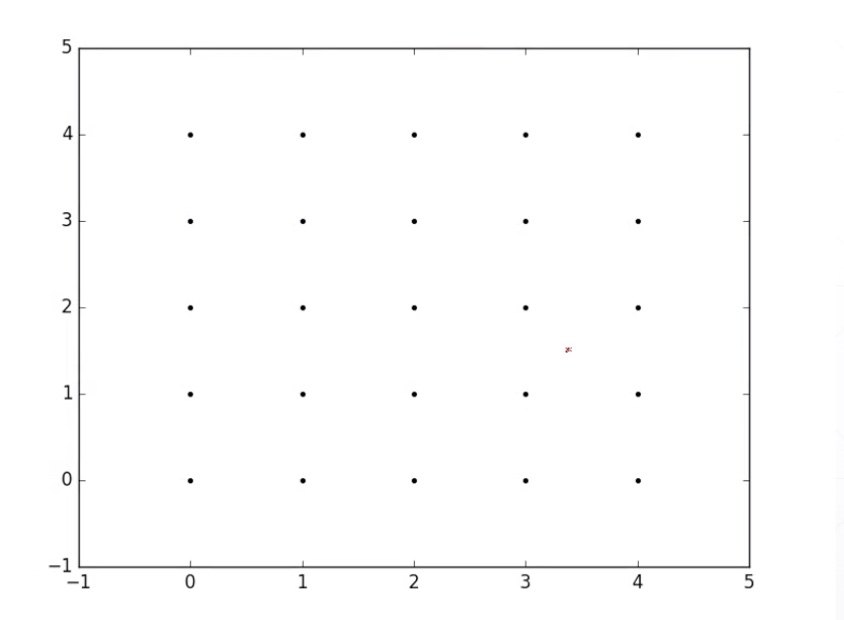

In [102]:
y = tf.linspace(-2., 2, 5)
y

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [104]:
x = tf.linspace(-2., 2, 5)
x

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [105]:
points_x, points_y = tf.meshgrid(x, y)
points_x.shape

TensorShape([5, 5])

In [106]:
points_x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]], dtype=float32)>

In [107]:
points_y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]], dtype=float32)>

In [ ]:
points = tf.stack([points_x, points_y], axis=2)
points

In [5]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'